## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

# 預防錯誤： OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
def build_mlp(input_shape:int, output_units=10):
    """使用兩層隱藏層，一個輸出層(softmax)
    """
    input_layer = keras.layers.Input(input_shape)
    x = keras.layers.Dense(units=128, activation="relu", name="hidden_layer_0")(input_layer)
    x = keras.layers.Dense(units=64, activation="relu", name="hidden_layer_1")(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [16]:
"""
設定超參數
momentum: float >= 0
nesterov: boolean
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.85, 0.75]
NESTEROV = [True, False]

In [18]:
results = {}
"""
以NESTEROV & MOMENTUM跑兩層迴圈
"""
results = {}

for nesterov in NESTEROV:
    for momentum in MOMENTUM:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with NESTEROV = {}, MOMENTUM={}".format(str(nesterov), str(momentum)))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=momentum)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-nest-{}-mom-{}".format(str(nesterov), str(momentum))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with NESTEROV = True, MOMENTUM=0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_0 (Dense)       (None, 128)               393344    
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.8586 - acc: 0.3365 - val_loss: 1.7141 - v

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.9074 - acc: 0.3162 - val_loss: 1.8542 - val_acc: 0.3453
Epoch 2/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.7197 - acc: 0.3895 - val_loss: 1.7167 - val_acc: 0.3893
Epoch 3/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.6451 - acc: 0.4172 - val_loss: 1.6295 - val_acc: 0.4186
Epoch 4/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5887 - acc: 0.4382 - val_loss: 1.6275 - val_acc: 0.4156
Epoch 5/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5459 - acc: 0.4520 - val_loss: 1.5987 - val_acc: 0.4292
Epoch 6/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5058 - acc: 0.4675 - val_loss: 1.6206 - val_acc: 0.4226
Epoch 7/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.4742 - acc: 0.4770 - val_loss: 1.5272 - val_a

Epoch 3/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.7229 - acc: 0.3944 - val_loss: 1.6793 - val_acc: 0.4088
Epoch 4/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.6669 - acc: 0.4153 - val_loss: 1.7543 - val_acc: 0.3721
Epoch 5/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.6307 - acc: 0.4255 - val_loss: 1.7984 - val_acc: 0.3702
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5987 - acc: 0.4384 - val_loss: 1.9322 - val_acc: 0.3467
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.5744 - acc: 0.4477 - val_loss: 1.6033 - val_acc: 0.4277
Epoch 8/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5423 - acc: 0.4566 - val_loss: 1.6165 - val_acc: 0.4377
Epoch 9/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5259 - acc: 0.4629 - val_loss: 1.5722 - val_acc: 0.4453
Epoch 10/50
50000/50000 [===============

50000/50000 [==============================] - 4s 82us/step - loss: 1.5364 - acc: 0.4557 - val_loss: 1.5623 - val_acc: 0.4443
Epoch 6/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5116 - acc: 0.4617 - val_loss: 1.5104 - val_acc: 0.4633
Epoch 7/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.4844 - acc: 0.4719 - val_loss: 1.4995 - val_acc: 0.4701
Epoch 8/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4695 - acc: 0.4772 - val_loss: 1.4756 - val_acc: 0.4749
Epoch 9/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.4448 - acc: 0.4876 - val_loss: 1.5054 - val_acc: 0.4660
Epoch 10/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.4324 - acc: 0.4902 - val_loss: 1.4547 - val_acc: 0.4862
Epoch 11/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.4104 - acc: 0.4971 - val_loss: 1.4620 - val_acc: 0.4779
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 4s 81us/step - loss: 1.5048 - acc: 0.4675 - val_loss: 1.5424 - val_acc: 0.4541
Epoch 8/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.4772 - acc: 0.4750 - val_loss: 1.5462 - val_acc: 0.4497
Epoch 9/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.4616 - acc: 0.4810 - val_loss: 1.5502 - val_acc: 0.4480
Epoch 10/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.4385 - acc: 0.4908 - val_loss: 1.5118 - val_acc: 0.4637
Epoch 11/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.4152 - acc: 0.4985 - val_loss: 1.4569 - val_acc: 0.4789
Epoch 12/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.3978 - acc: 0.5042 - val_loss: 1.4297 - val_acc: 0.4922
Epoch 13/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.3823 - acc: 0.5117 - val_loss: 1.4324 - val_acc: 0.4892
Epoch 14/50
50000/50000 [=======================

50000/50000 [==============================] - 4s 82us/step - loss: 1.5012 - acc: 0.4697 - val_loss: 1.5237 - val_acc: 0.4588
Epoch 10/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.4789 - acc: 0.4798 - val_loss: 1.5174 - val_acc: 0.4565
Epoch 11/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.4599 - acc: 0.4848 - val_loss: 1.5039 - val_acc: 0.4700
Epoch 12/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.4499 - acc: 0.4888 - val_loss: 1.4754 - val_acc: 0.4761
Epoch 13/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.4279 - acc: 0.4962 - val_loss: 1.5042 - val_acc: 0.4616
Epoch 14/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.4175 - acc: 0.4975 - val_loss: 1.4679 - val_acc: 0.4777
Epoch 15/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.4035 - acc: 0.5061 - val_loss: 1.4835 - val_acc: 0.4713
Epoch 16/50
50000/50000 [=====================

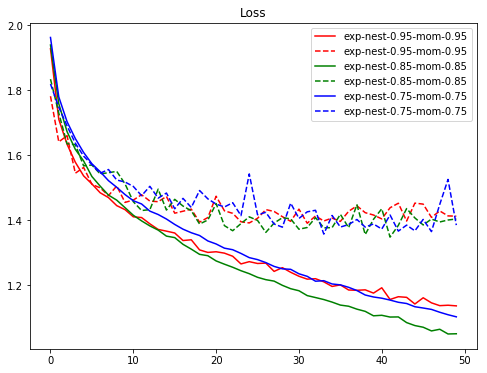

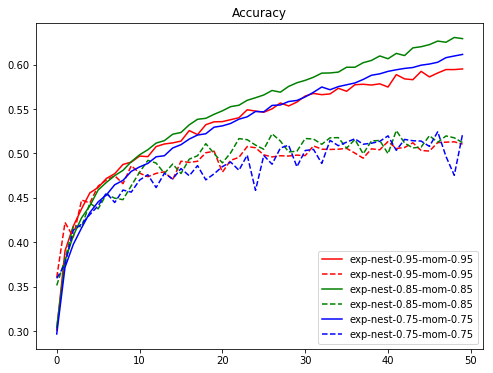

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

'exp-nest-a-mom-b'